Step 1:  Get a list of movie ratings
This movie list comes from the Movielens dataset.  Note that I tried running it against the big dataset but ran into memory problems when I tried to create a pivot table in a later step.

In [60]:
# import pandas library 
import pandas as pd 
  
# Get the data 

base_data_path = "sample-data-small/"
#base_data_path = "sample-data-large/"  # folder containing larger set of user reviews
  
path = base_data_path + 'ratings.csv'    
df = pd.read_csv(path) 
  
# Check the head of the data 
df.head() 

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Step 2:  Get a list of the movie titles.  NOte that the tiles are kept in a separate file.  

In [61]:

path = base_data_path + 'movies.csv'   
movie_titles = pd.read_csv(path) 
movie_titles.head() 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Step 3:  Merge the ratings and movies into a single dataframe

In [62]:

data = pd.merge(df, movie_titles, on='movieId') 
data = data.drop_duplicates()
data.head() 

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


Step 4:  Calculate the average rating for all of the movies

In [63]:
# Calculate mean rating of all movies 
data.groupby('title')['rating'].mean().sort_values(ascending=False).head() 

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

Step 5:  Count the number of ratings for each movie

In [64]:

# creating dataframe with 'rating' count values 
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())  
  
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count()) 
  
ratings.head() 

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Step 6:  Lets add some visualizations.  First, lets import our tools

In [65]:
# The next two line only needs to be run once
#%pip install matplotlib
#%pip install seaborn
import matplotlib.pyplot as plt 
import seaborn as sns 
  
sns.set_style('white') 
%matplotlib inline 



Now lets create a plot to see the number of ratings

<Axes: >

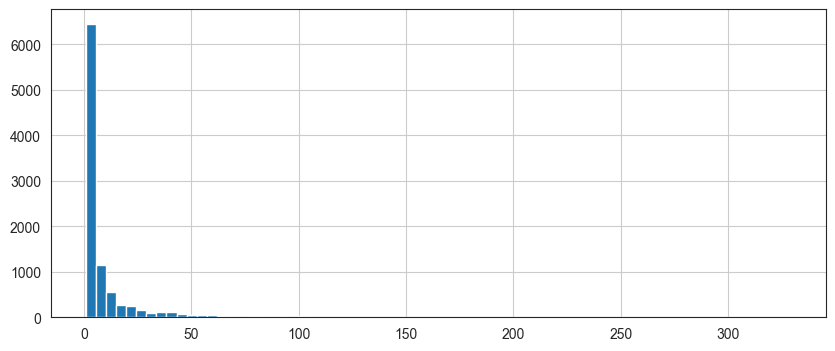

In [66]:
# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 
  
ratings['num of ratings'].hist(bins = 70) 

Now lets see the ratings in a plot

<Axes: >

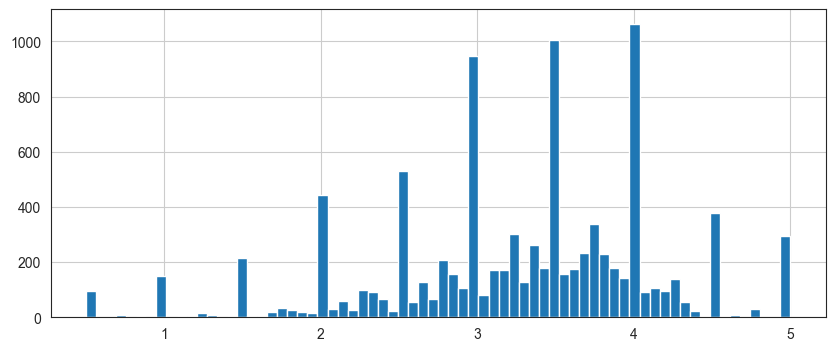

In [67]:

# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 
  
ratings['rating'].hist(bins = 70) 

Lets now sort the frame based on the ratings

In [69]:
moviemat = data.pivot_table(index ='userId', 
              columns ='title', values ='rating') 
  
# moviemat.head()
#ratings_scrubbed = ratings.drop_duplicates()
  
#ratings_scrubbed.sort_values('num of ratings', ascending = False).head(10) 

Lets see if we can find a correlation between two movies
First, load up the ratings for two movies

In [85]:

# analysing correlation with similar movies
# movie1 = 'Die Hard (1988)'
movie1 = 'Star Wars: Episode IV - A New Hope (1977)'
movie2 = 'Liar Liar (1997)'
movie1_user_ratings = moviemat[movie1] 
movie2_user_ratings = moviemat[movie2] 
 
# sanity check - verify the   
movie1_user_ratings.head() 

userId
1    5.0
2    NaN
3    NaN
4    5.0
5    NaN
Name: Star Wars: Episode IV - A New Hope (1977), dtype: float64

Now that we have two movies, we can see if we can find a correlation with other movies
The correlation range goes from -1 to 1, and a higher number is better.  Postive value implies positive correlation.

In [86]:
# analysing correlation with similar movies 
similar_to_movie1 = moviemat.corrwith(movie1_user_ratings) 
similar_to_movie2 = moviemat.corrwith(movie2_user_ratings) 
  
corr_movie1 = pd.DataFrame(similar_to_movie1, columns =['Correlation']) 
corr_movie1.dropna(inplace = True) 
  
corr_movie1.head() 

c:\Projects\Machine Learning\Movie-Recommender\.venv\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Projects\Machine Learning\Movie-Recommender\.venv\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Projects\Machine Learning\Movie-Recommender\.venv\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Projects\Machine Learning\Movie-Recommender\.venv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Projects\Machine Learning\Movie-Recommender\.venv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Correlation
title,
"'burbs, The (1989)",0.155161
(500) Days of Summer (2009),0.024299
*batteries not included (1987),-0.269069
10 Cent Pistol (2015),1.000000
10 Cloverfield Lane (2016),0.360885


Now it is time to find a movies that are similar to movie1

In [87]:

# Similar movies like starwars 
corr_movie1.sort_values('Correlation', ascending = False).head(10) 
final_movie1 = corr_movie1.join(ratings['num of ratings']) 
  
#corr_movie1.head() 
  
final_movie1[final_movie1['num of ratings']>100].sort_values('Correlation', ascending = False).head(50)

,Correlation,num of ratings
title,,
Star Wars: Episode IV - A New Hope (1977),1.000000,251
Star Wars: Episode V - The Empire Strikes Back (1980),0.777970,211
Star Wars: Episode VI - Return of the Jedi (1983),0.734230,196
"Fugitive, The (1993)",0.482078,190
Indiana Jones and the Last Crusade (1989),0.410916,140
"Lord of the Rings: The Return of the King, The (2003)",0.406602,185
Ghostbusters (a.k.a. Ghost Busters) (1984),0.391613,120
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),0.384779,200
"Godfather, The (1972)",0.365920,192
